In [67]:
%matplotlib inline
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
input_file = '/home/fatemeh/projects/mantis/res.out'
df = pd.read_csv(input_file, sep=":", header=None, names=['oneCnt', 'eqClsCnt'])
num_samples = 2582

In [41]:
df = df.sort_values(by='eqClsCnt', ascending=False)
df.head()

,oneCnt,eqClsCnt
1177,2,20424957
1240,3,19626062
1234,4,15986416
1242,1,14577570
1238,5,12530958


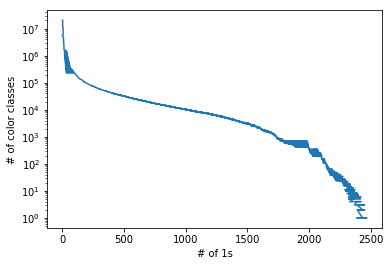

In [43]:
plt.plot(df.oneCnt, df.eqClsCnt)
plt.xlabel('# of 1s')
plt.ylabel('# of color classes')
plt.yscale('log')

In [24]:
psum = 0
cnt = 0
for idx, row in df.iterrows():
    psum += (row[0])*row[1]
    cnt += row[1]
print('total cnt: {} , average # of 1s: {}'.format(cnt, psum/cnt))

total cnt: 222584822 , average # of 1s: 96.21851250037166


In [7]:
input_file = '/mnt/scratch7/pufferfish_data/gencode.v25.pc_transcripts_fixed.fa'
output_file = '/mnt/scratch2/ssbt_experiment/gencode.v25.pc_transcripts_fixed_r1000.txt'
randNum = 1000

lst = []
with open(input_file, 'r') as f:
    for line in f:
        if line[0] == '>':
            txpName = line[1:-2]
        else:
            txpStr = line[:-2]
            lst += [[txpName, txpStr]]

txp_r = random.sample(lst, randNum)
with open(output_file, 'w') as f:
    for l in txp_r:
        f.write('{}\n'.format(l[1]))
        #f.write('>{}\n{}\n'.format(l[0], l[1]))


In [11]:
SSBT_res = '/mnt/scratch2/ssbt_experiment/test.out'
SSBT_res_reformated = '/mnt/scratch2/ssbt_experiment/test.reformated.out'

f = open(SSBT_res, 'r')
cntr = 1
with open(SSBT_res_reformated, 'w') as o:
    for line in f:
        if line[0] == '*':            
            o.write('{}'.format(cntr))
            cntr+=1;
        else:
            o.write(',{}'.format(line.split('/')[-1].split('\n')[0]))    

# drawing the plot for hash-based clustering and distance distribution

In [146]:
def hashBasedClusteringStat(file_name, file_name2):
    ## random keeping
    print("keep one bv randomly")
    df = pd.read_csv(file_name, sep=" ", header=None, names=['dist', 'eqClsCnt'])
    eqCntSum = df.sum()['eqClsCnt']
    print('Total sum of remaining eq classes: {}'.format(eqCntSum))
    df['perc'] = round(df['eqClsCnt']*100/eqCntSum, 2)
    df = df.sort_values('eqClsCnt', ascending=0)
    print(df.head(5))
    
    ## most popular
    print("\nKeep the most popular bv")
    popdf = pd.read_csv(file_name2, sep=" ", header=None, names=['dist', 'eqClsCnt'])
    eqCntSum = popdf.sum()['eqClsCnt']
    print('Total sum of remaining eq classes: {}'.format(eqCntSum))
    popdf['perc'] = round(popdf['eqClsCnt']*100/eqCntSum, 2)
    popdf = popdf.sort_values('eqClsCnt', ascending=0)
    print(popdf.head(5))
    
    plt.figure(figsize=(30, 5))
    # the complete distribution
    plt.subplot(231)
    plt.plot(df.dist, df.perc)
    
    # plot the first 10 most common edit distance
    plt.subplot(232)
    plt.scatter(df.dist[:10], df.perc[:10])
    
    # plot the first 100 most common edit distance
    plt.subplot(233)
    plt.scatter(df.dist[:100], df.perc[:100])
    
    # keep the most popular one while colliding
    # the complete distribution
    plt.subplot(234)
    plt.plot(popdf.dist, popdf.perc)
    plt.xlabel('dist (zero means not found)')
    plt.ylabel('percentage of eq. classes with this hamming distance')
    
    # plot the first 10 most common edit distance
    plt.subplot(235)
    plt.scatter(popdf.dist[:10], popdf.perc[:10])
    plt.xlabel('dist (zero means not found)')
    
    # plot the first 100 most common edit distance
    plt.subplot(236)
    plt.scatter(popdf.dist[:100], popdf.perc[:100])
    plt.xlabel('dist (zero means not found)')
    

    # Accumulative percentage
    editDistSorted = df.sort_values('dist', ascending=1)
    editDistSorted['cum'] = np.cumsum(editDistSorted.perc)
    popeditDistSorted = popdf.sort_values('dist', ascending=1)
    popeditDistSorted['cum'] = np.cumsum(popeditDistSorted.perc)
    
    plt.figure(figsize=(20, 10))
    plt.subplot(221)
    plt.plot(editDistSorted.dist, editDistSorted.cum)
    plt.title('Keep One Randomly: all')
    
    plt.subplot(222)
    plt.plot(editDistSorted.dist[:30], editDistSorted.cum[:30], '--bo')
    plt.title('Keep One Randomly: zoomed in for the first 30 most prevalent hamming distance')
    
    plt.subplot(223)
    plt.plot(popeditDistSorted.dist, popeditDistSorted.cum)
    plt.title('Keep Most Popular: all')
    plt.xlabel('dist (zero means not found)')
    plt.ylabel('Cumulative percentage of eq. classes based on hamming distance')
    
    plt.subplot(224)
    plt.plot(popeditDistSorted.dist[:30], popeditDistSorted.cum[:30], '--bo')
    plt.title('Keep Most Popular: zoomed in for the first 30 most prevalent hamming distance')
    plt.xlabel('dist (zero means not found)')
    

## 500k

keep one bv randomly
Total sum of remaining eq classes: 222084822
   dist  eqClsCnt  perc
4     4  13816083  6.22
5     5  12708160  5.72
3     3  12022044  5.41
6     6  11011749  4.96
7     7   9182012  4.13

Keep the most popular bv
Total sum of remaining eq classes: 222084822
   dist  eqClsCnt  perc
2     2  18828035  8.48
3     3  15843756  7.13
4     4  12077424  5.44
5     5  10090360  4.54
6     6   8865462  3.99


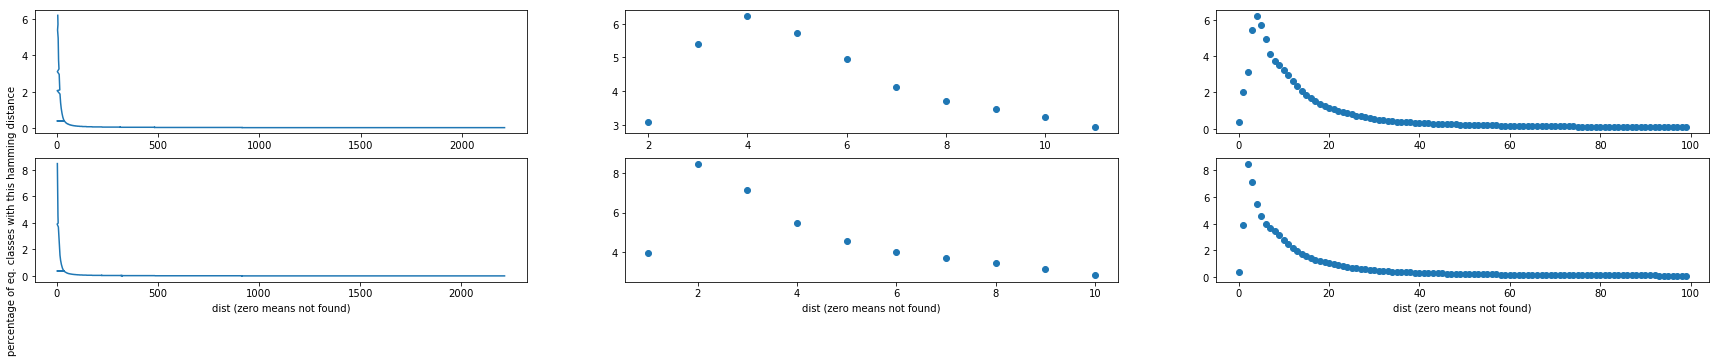

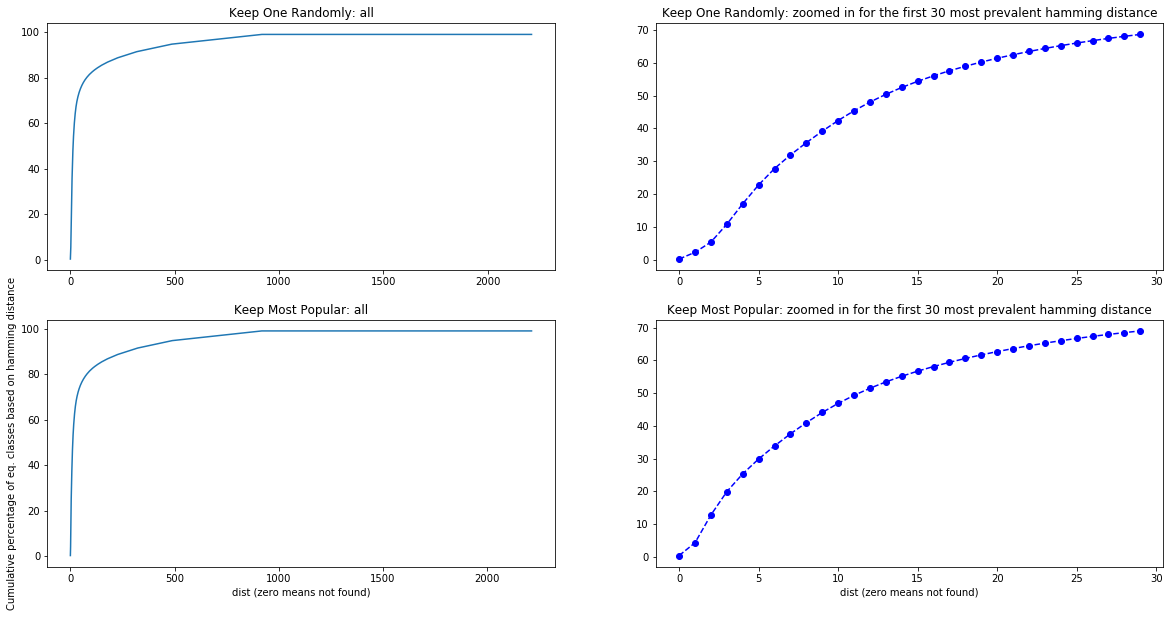

In [147]:
hashBasedClusteringStat('/home/fatemeh/projects/mantis/hash-clustering-500k.dist',
                       '/home/fatemeh/projects/mantis/mostPop-hash-clustering-500k.dist')

## 1M

keep one bv randomly
Total sum of remaining eq classes: 221584822
   dist  eqClsCnt  perc
6     6  13468336  6.08
5     5  13403175  6.05
7     7  11117075  5.02
8     8   9929922  4.48
9     9   9502825  4.29

Keep the most popular bv
Total sum of remaining eq classes: 221584822
   dist  eqClsCnt  perc
2     2  19125225  8.63
3     3  15982959  7.21
4     4  12120196  5.47
5     5  10056486  4.54
1     1   9043588  4.08


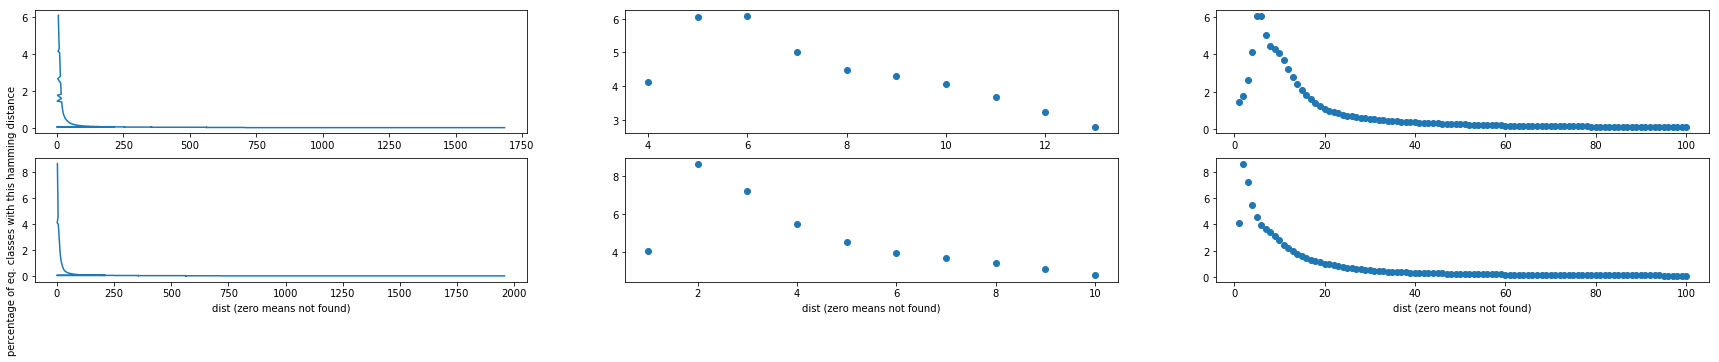

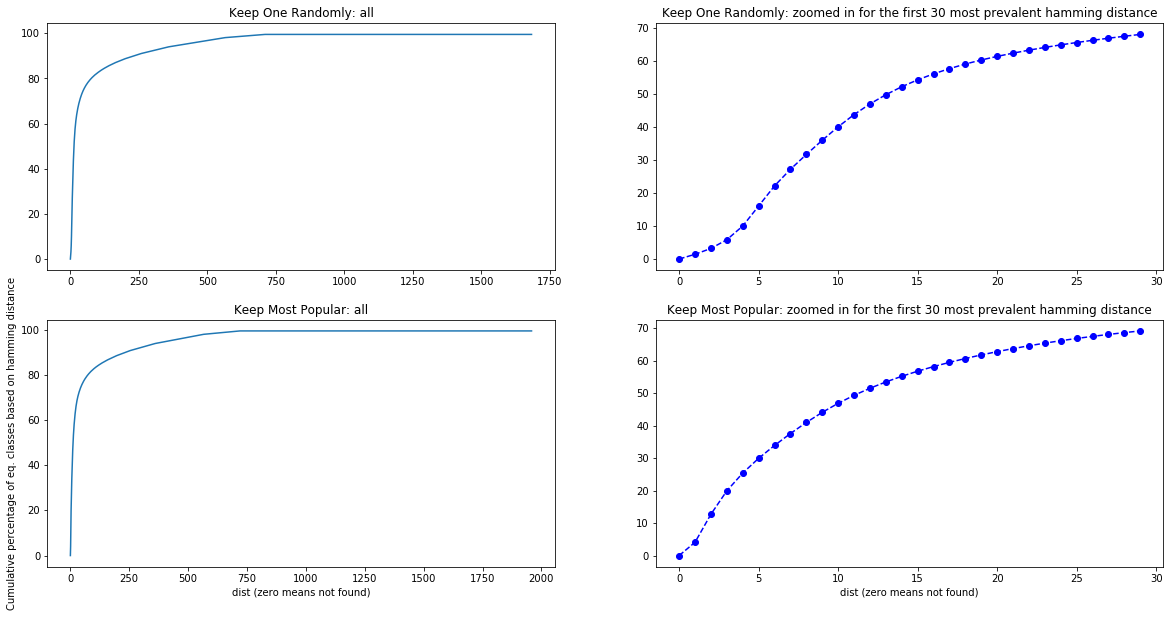

In [148]:
hashBasedClusteringStat('/home/fatemeh/projects/mantis/hash-clustering-1M.dist',
                       '/home/fatemeh/projects/mantis/mostPop-hash-clustering-1M.dist')

## 10M

keep one bv randomly
Total sum of remaining eq classes: 221584822
   dist  eqClsCnt  perc
6     6  13468336  6.08
5     5  13403175  6.05
7     7  11117075  5.02
8     8   9929922  4.48
9     9   9502825  4.29

Keep the most popular bv
Total sum of remaining eq classes: 0.0
Empty DataFrame
Columns: [dist, eqClsCnt, perc]
Index: []


AttributeError: 'Series' object has no attribute 'find'

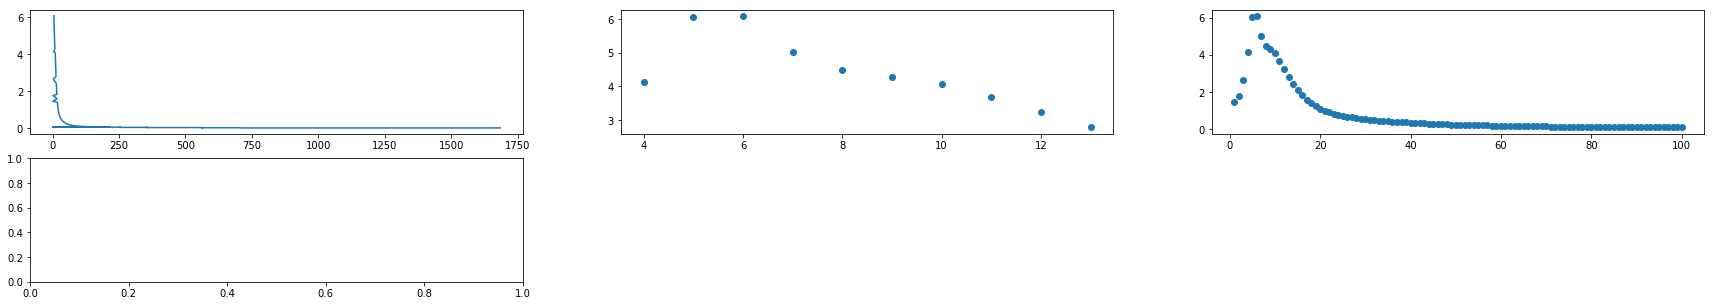

In [142]:
hashBasedClusteringStat('/home/fatemeh/projects/mantis/hash-clustering-1M.dist',
                       '/home/fatemeh/projects/mantis/mostPop-hash-clustering-1M.dist')

# Collisions

In [149]:
def collisionStat(file_name):
    df = pd.read_csv(file_name, sep="," )
    #df.info()
    #df.head()
    print(df.head(3))
    print(df.tail(3))
    plt.figure(figsize=(20, 10))
    plt.subplot(121)
    plt.plot(df['CollisionCnt'], df['BlockCnt'])
    plt.title('All collisions')
    plt.xlabel('Collision Count')
    plt.ylabel('# of Blocks with that many collision')
    plt.subplot(122)
    plt.scatter(df['CollisionCnt'][:1000], df['BlockCnt'][:1000])
    plt.title('Collisions up to 1000')
    plt.xlabel('Collision Count')
    plt.ylabel('# of Blocks with that many collision')
    plt.tight_layout()

## 500k

   CollisionCnt  BlockCnt
0            12         1
1            23         1
2            28         1
       CollisionCnt  BlockCnt
69796        486867         1
69797        487975         1
69798        491849         1


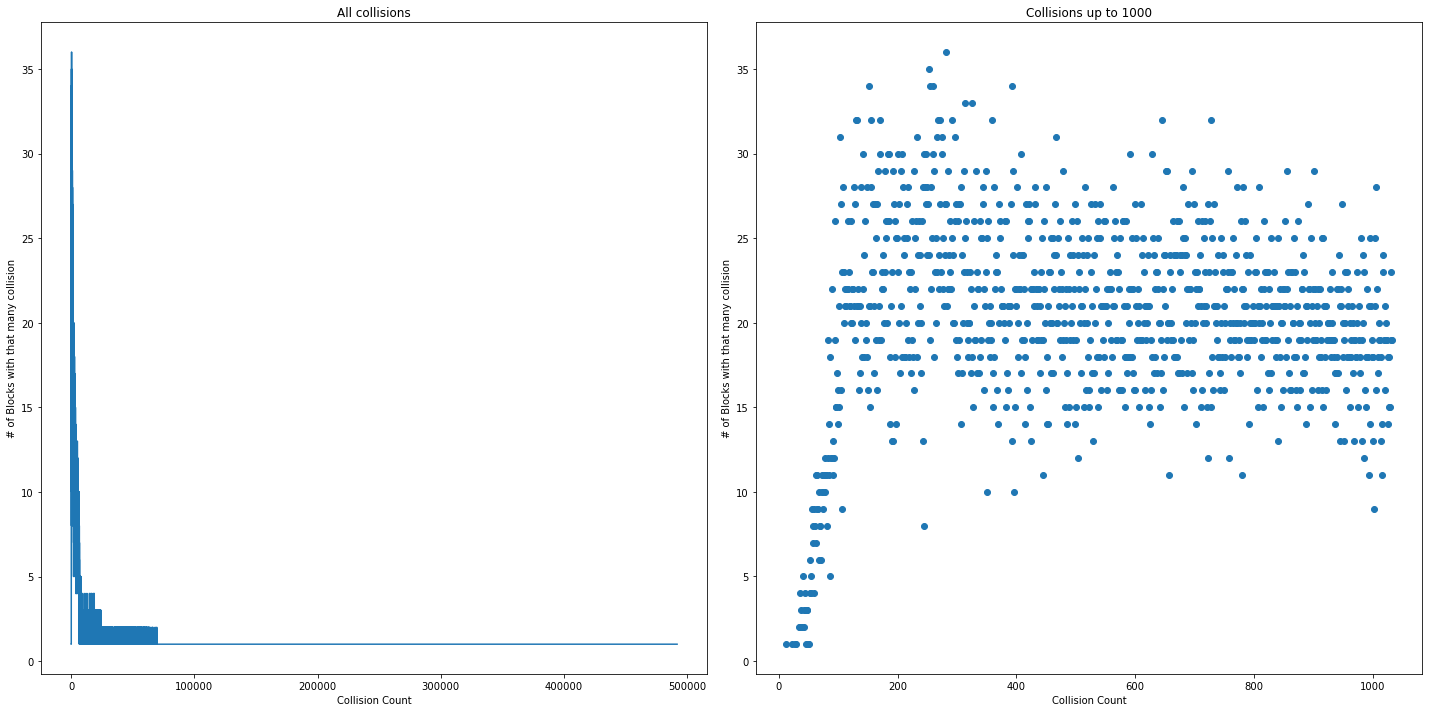

In [150]:
collisionStat('/home/fatemeh/projects/mantis/collisions-500000.dist')

## 1M

   CollisionCnt  BlockCnt
0            16         1
1            29         1
2            38         1
        CollisionCnt  BlockCnt
160484        943559         1
160485        947917         1
160486        949111         1


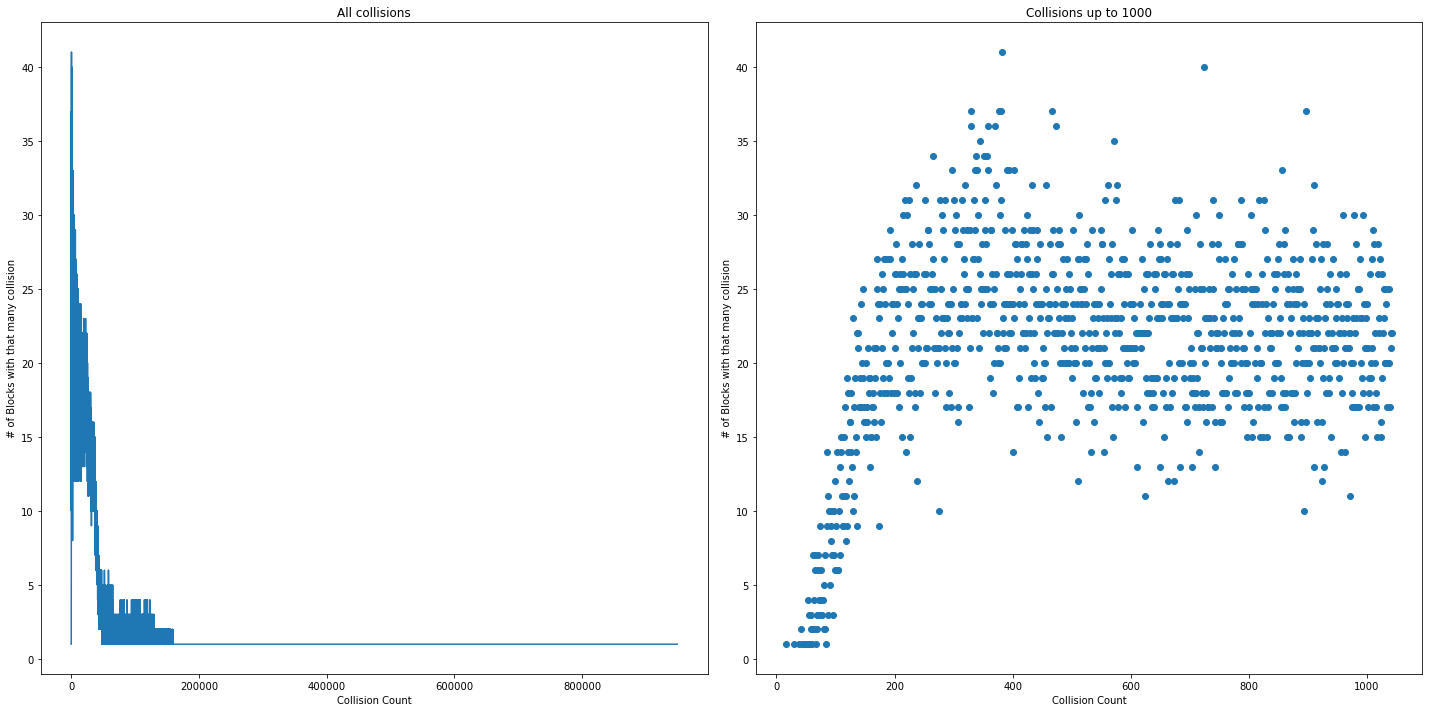

In [151]:
collisionStat('/home/fatemeh/projects/mantis/collisions-1000000.dist')

## 10M

   CollisionCnt  BlockCnt
0            70         1
1            79         2
2            80         1
         CollisionCnt  BlockCnt
2490864       8607971         1
2490865       9271060         1
2490866       9274731         1


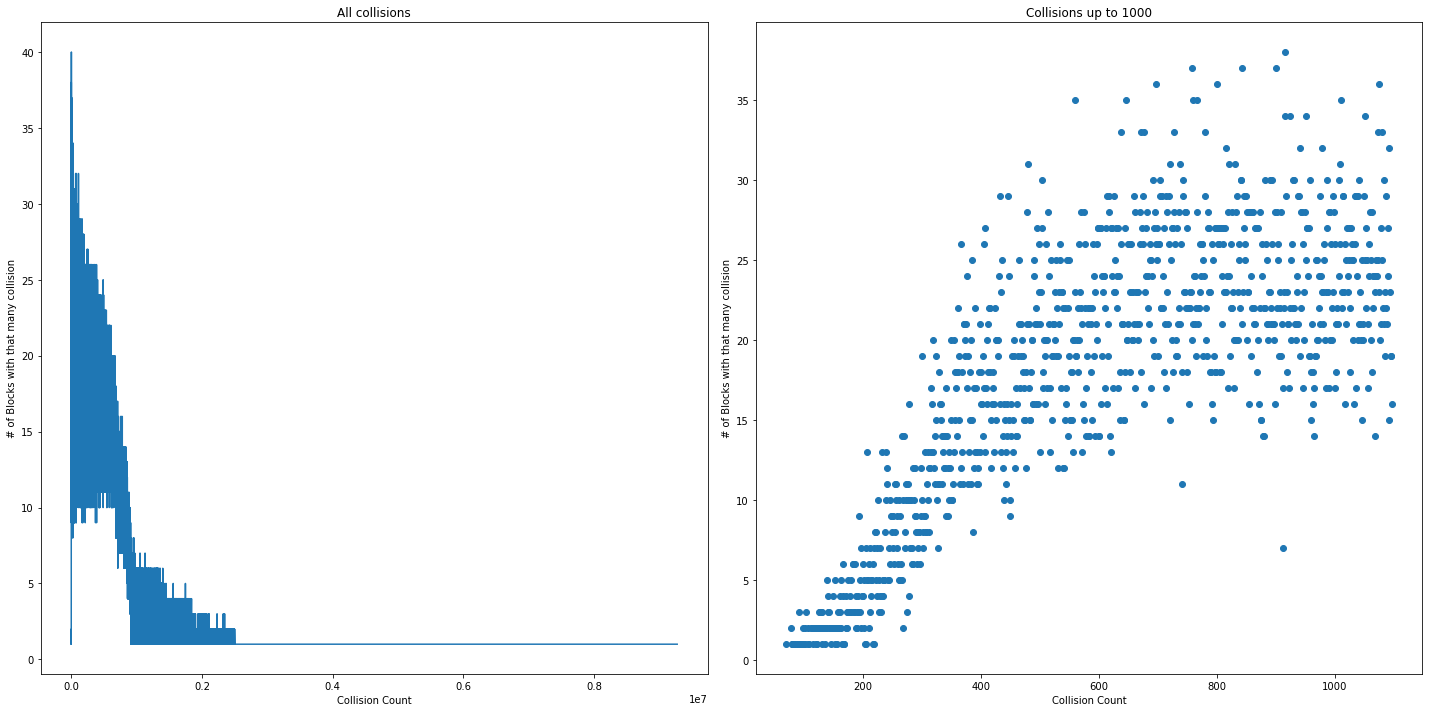

In [152]:
collisionStat('/home/fatemeh/projects/mantis/collisions-10000000.dist')